In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_probs = pd.read_csv(r'../outputs/outputs_SVM_GFK/output_GKF_canonizer_author_scale.csv')

In [3]:
df_probs.rename(columns={"Unnamed: 0": "index"}, inplace=True)
df_probs.set_index("index", inplace = True)

In [4]:
def dated(df):
    df_res = df.copy()
    list_date = []
    for elem in df_res.index:
        index, date = shorted_str(elem)
        list_date.append(date)
    df_res['date'] = list_date
    return df_res

In [5]:
def raccourcis(df):
    df_res = df.copy()
    shorter_index, list_date = [], []
    for elem in df_res.index:
        index, date = shorted_str(elem)
        shorter_index.append(index)
        list_date.append(date)
    df_res.index = shorter_index
    df_res['date'] = list_date
    return df_res

In [6]:
def shorted_str(string):
    date = int(string[:4])
    shorter_str = string[:4]
    conteur = 0
    for i in range(1, len(string)):
        if string[i]=='_':
            conteur+=1
        
        if (string[i-1] == '_' or string[i-1] == '-') and conteur < 3:
            if string[i-1] == '_':
                shorter_str+=string[i-1]
            shorter_str+=string[i].upper()
            
    return shorter_str, date

In [7]:
df_probs_shorter = raccourcis(df_probs)

In [8]:
df_probs = dated(df_probs)

In [9]:
sns.set_palette('bright')
sns.set_context("talk")
sns.set_style("darkgrid")

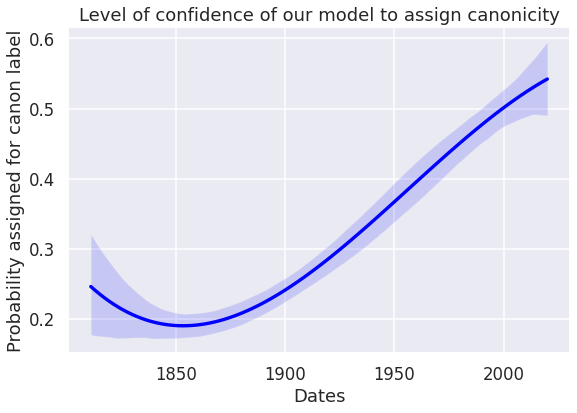

In [10]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')

ax = sns.regplot(data=df_probs_shorter, 
                 x='date', 
                 y='proba_canon', 
                 color='blue', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

In [11]:
hue_order = ['canon', 'non_canon']

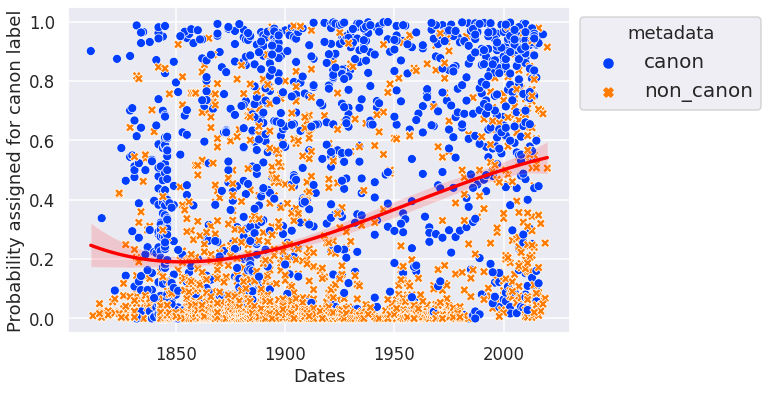

In [12]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
#ax.set_title('Level of confidence of our model to assign canonicity, novel scale')


ax = sns.scatterplot(data=df_probs_shorter, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     hue_order=hue_order,
                     style="metadata",
                     style_order=hue_order,
                     ax=ax)


ax = sns.regplot(data=df_probs_shorter, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), fontsize = 20)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.savefig('../img/MAIN_viz_author_scale.png', format='png', bbox_inches='tight', dpi=400)


plt.show()

### SELECT PREDS == CANON

In [11]:
results_canon = df_probs_shorter[df_probs_shorter['prediction']=='canon']

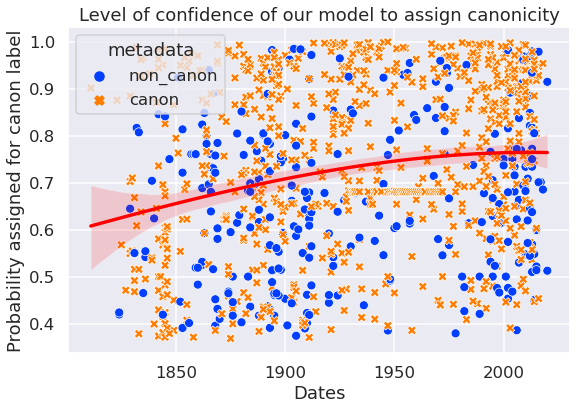

In [12]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=results_canon, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=results_canon, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

In [13]:
results_noncanon = df_probs_shorter[df_probs_shorter['prediction']=='non_canon']

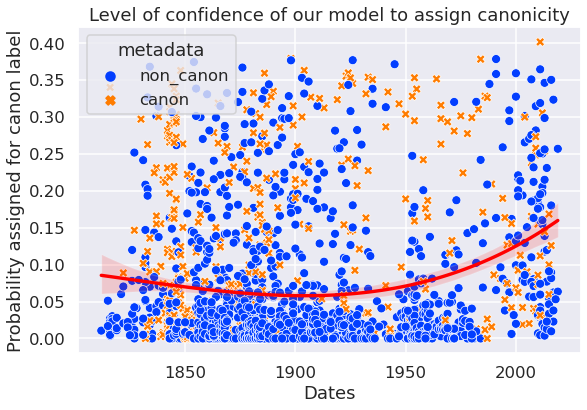

In [14]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=results_noncanon, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=results_noncanon, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

### SELECT GT == CANON

In [15]:
results_gt_canon = df_probs_shorter[df_probs_shorter['metadata']=='canon']

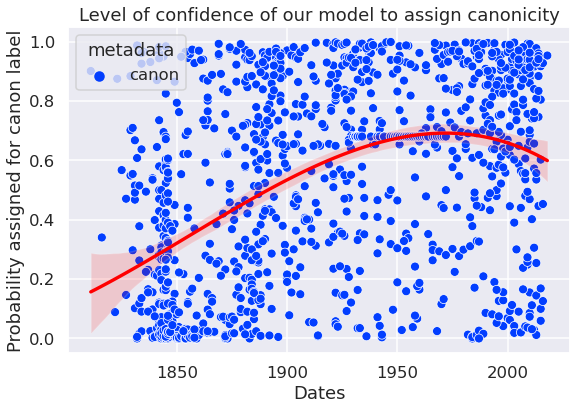

In [16]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=results_gt_canon, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=results_gt_canon, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()

In [56]:
results_gt_noncanon = df_probs_shorter[df_probs_shorter['metadata']=='non_canon']

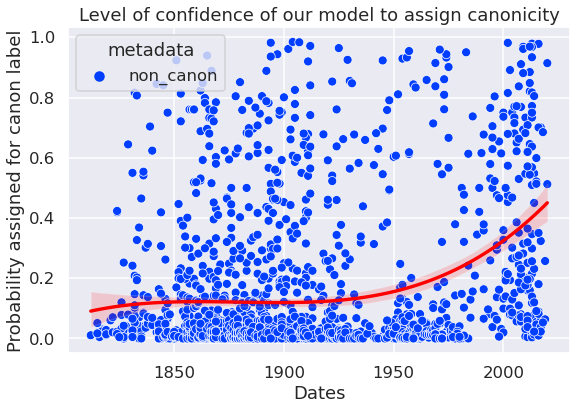

In [60]:
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.set_title('Level of confidence of our model to assign canonicity')


ax = sns.scatterplot(data=results_gt_noncanon, 
                     x='date', 
                     y='proba_canon', 
                     hue='metadata', 
                     style="metadata",
                     ax=ax)


ax = sns.regplot(data=results_gt_noncanon, 
                 x='date', 
                 y='proba_canon', 
                 color='red', 
                 order=3, 
                 scatter=False, 
                 ax=ax)

ax.set_xlabel('Dates')
ax.set_ylabel('Probability assigned for canon label')

plt.show()